## Shirel Alimi   [Github-Repository ](https://github.com/ShirelAlimi/Advanced-data-analysis-in-Python-2024)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [ ]:
fpath = ''    # Global_path -> Enter Your Path

In [ ]:
cardf = pd.read_csv(fpath)
cardf.head()

,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Area,City,Price,Pic_num,Cre_date,Repub_date,Description,Color,Km,Test,Supply_score
0,יונדאי,2015,i35,2,אוטומטית,1600,בנזין,פרטית,פרטית,רעננה - כפר סבא,רעננה,51000.0,2.0,11/07/2023,11/07/2023,['רכב שמור בקנאות\nמוכרת עקב קבלת רכב חברה'],כחול כהה מטאלי,144000,NaN,NaN
1,ניסאן,2018,ניסאן מיקרה,1,אוטומטית,1200,בנזין,פרטית,פרטית,מושבים בשרון,אבן יהודה,49000.0,0.0,06/04/2022,22/05/2022,['שמורה כל התוספות'],כחול בהיר,69000,NaN,NaN
2,סוזוקי,2010,סוזוקי סוויפט,1,אוטומטית,1450,בנזין,NaN,NaN,רמת,רמת,22500.0,1.0,29/10/2022,29/10/2022,['רכב במצב מתוחזק ברמה גבוהה טסט עד אפריל 2023'],NaN,145000,NaN,NaN
3,טויוטה,2016,אוריס,1,טיפטרוניק,1600,בנזין,פרטית,פרטית,נס ציונה - רחובות,רחובות,63000.0,5.0,16/05/2024,16/05/2024,['אוטו במצב חדש!! שמור בקנאות!! נהג יחיד מטופל...,אפור מטאלי,27300,NaN,NaN
4,קיה,2012,פיקנטו,1,אוטומטית,1248,בנזין,NaN,NaN,"ראשל""צ והסביבה",ראשון לציון,37000.0,1.0,13/06/2022,13/06/2022,['שמור'],NaN,70000,NaN,4.0


In [ ]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1500 non-null   object 
 1   Year             1500 non-null   int64  
 2   model            1500 non-null   object 
 3   Hand             1500 non-null   int64  
 4   Gear             1499 non-null   object 
 5   capacity_Engine  1474 non-null   object 
 6   Engine_type      1495 non-null   object 
 7   Prev_ownership   771 non-null    object 
 8   Curr_ownership   772 non-null    object 
 9   Area             1351 non-null   object 
 10  City             1500 non-null   object 
 11  Price            1500 non-null   float64
 12  Pic_num          1476 non-null   float64
 13  Cre_date         1500 non-null   object 
 14  Repub_date       1500 non-null   object 
 15  Description      1500 non-null   object 
 16  Color            730 non-null    object 
 17  Km            

In [ ]:
def data_prep(df):

    df = df[pd.to_datetime(df['Cre_date'], dayfirst=True, errors='coerce').notna()]
    df = df[pd.to_datetime(df['Repub_date'], dayfirst=True, errors='coerce').notna()]

    df['Cre_date'] = pd.to_datetime(df['Cre_date'], dayfirst=True)
    df['Repub_date'] = pd.to_datetime(df['Repub_date'], dayfirst=True)

    df['capacity_Engine'] = pd.to_numeric(df['capacity_Engine'], errors='coerce')
    df['Km'] = pd.to_numeric(df['Km'], errors='coerce')
    df['manufactor'] = df['manufactor'].replace('Lexsus', 'לקסוס')
    df['Gear'] = df['Gear'].replace('אוטומט', 'אוטומטית')
    df['Pic_num'] = df['Pic_num'].fillna(0).astype(int)

    categorical_columns = ['manufactor', 'model', 'Gear', 'Engine_type', 'Area', 'City']
    for col in categorical_columns:
        df[col] = df[col].astype('category')

    df['Current_Year'] = 2024
    df['age']=df['Current_Year']- df['Year']
    df['Km'] = df.groupby(['Year', 'Engine_type'])['Km'].transform(lambda x: x.fillna(x.mean()))
    df['capacity_Engine'] = df.groupby(['Engine_type', 'Year', 'model'])['capacity_Engine'].transform(lambda x: x.fillna(x.mean()))

    df.dropna(subset=['Km','Area','capacity_Engine','Gear'], inplace=True)
    columns_to_remove = ['Prev_ownership', 'Curr_ownership', 'Color', 'Supply_score','Test','Year','Current_Year']
    df.drop(columns=columns_to_remove, inplace=True)


    return df

In [ ]:
X= cardf.drop(columns=['Price'])
y = cardf['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = data_prep(X_train)
X_test = data_prep(X_test)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

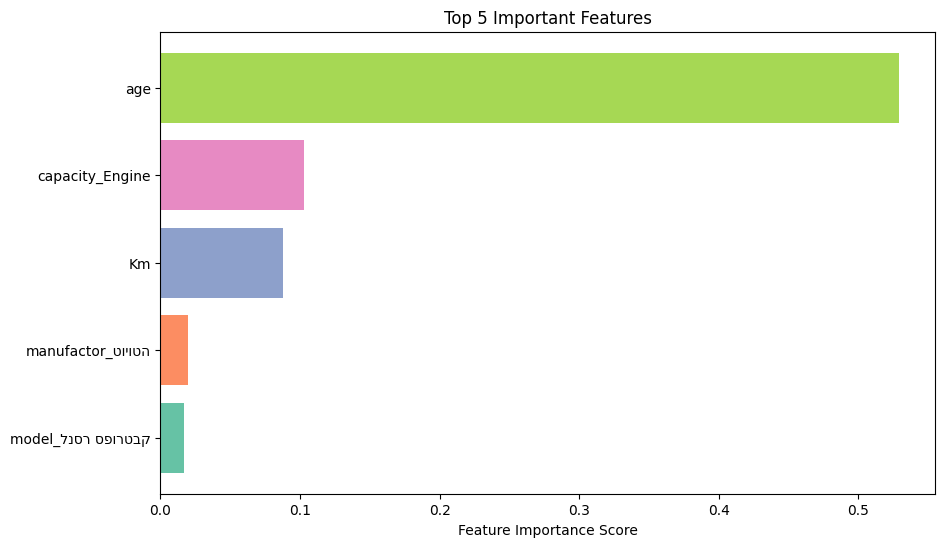

In [ ]:
col = ['Repub_date', 'Cre_date']
X_train.drop(columns=col, inplace=True)
X_test.drop(columns=col, inplace=True)

X_train, y_train = X_train.align(y_train, join='inner', axis=0)


model = GradientBoostingRegressor()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_


important_indices = np.argsort(feature_importances)[-5:]
important_features = X_train.columns[important_indices]
important_scores = feature_importances[important_indices]

plt.figure(figsize=(10, 6))
plt.barh(important_features, important_scores, color=sns.color_palette('Set2'))
plt.xlabel('Feature Importance Score')
plt.title('Top 5 Important Features')
plt.show()


In [ ]:
X_train_top = X_train[important_features]
X_test_top = X_test[important_features]

scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
elastic_net = ElasticNet()
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

cv_scores = cross_val_score(elastic_net, X_train_top_scaled, y_train, cv=10, scoring=mse_scorer)
mean_cv_score = np.mean(cv_scores)

print(f'Mean CV Score (MSE): {-mean_cv_score}')
elastic_net.fit(X_train_top_scaled, y_train)

X_test_top_scaled = scaler.transform(X_test_top)
y_pred = elastic_net.predict(X_test_top_scaled)

print("\nFirst few predictions:")
y_pred[:5]

Mean CV Score (MSE): 294234608.9918402

First few predictions:


array([44010.80821925, 17566.4751828 , 49522.84338693, 46107.19674204,
       27841.5195816 ])